In [5]:
import matplotlib.pyplot as plt
import tensorflow as tf   
import numpy as np

In [9]:
# 读取图片
image_raw_data = tf.gfile.FastGFile("../../datasets/cat.jpg", 'rb').read()
with tf.Session() as sess:
    # tf.image.decode_png/jpeg对图片进行解码,返回一个张量. 注意要用sess调用运行
    img_data = tf.image.decode_jpeg(image_raw_data)
    
    # 输出解码之后的三维矩阵。
    print(img_data.eval())
    img_data.set_shape([1797, 2673, 3])
    print(img_data.get_shape())

[[[162 161 140]
  [162 162 138]
  [161 161 137]
  ...
  [106 140  46]
  [101 137  47]
  [102 141  52]]

 [[164 162 139]
  [163 161 136]
  [163 161 138]
  ...
  [104 138  43]
  [102 139  46]
  [108 138  50]]

 [[165 163 140]
  [165 163 138]
  [163 161 136]
  ...
  [104 135  41]
  [102 137  43]
  [108 139  45]]

 ...

 [[207 200 181]
  [206 199 180]
  [206 199 180]
  ...
  [109  84  53]
  [107  84  53]
  [106  81  50]]

 [[205 200 180]
  [205 200 180]
  [206 199 180]
  ...
  [106  83  49]
  [105  82  51]
  [106  81  50]]

 [[205 200 180]
  [205 198 179]
  [205 198 179]
  ...
  [108  86  49]
  [105  82  48]
  [104  81  49]]]
(1797, 2673, 3)


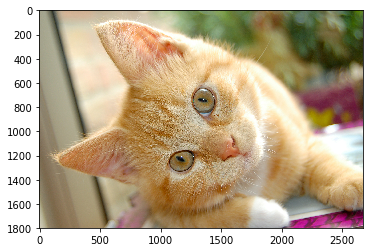

In [10]:
with tf.Session() as sess:
    plt.imshow(img_data.eval())
    plt.show()

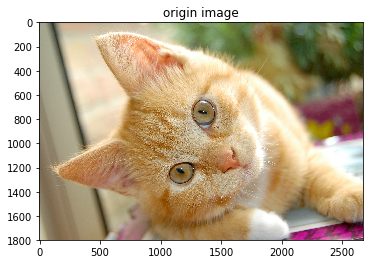

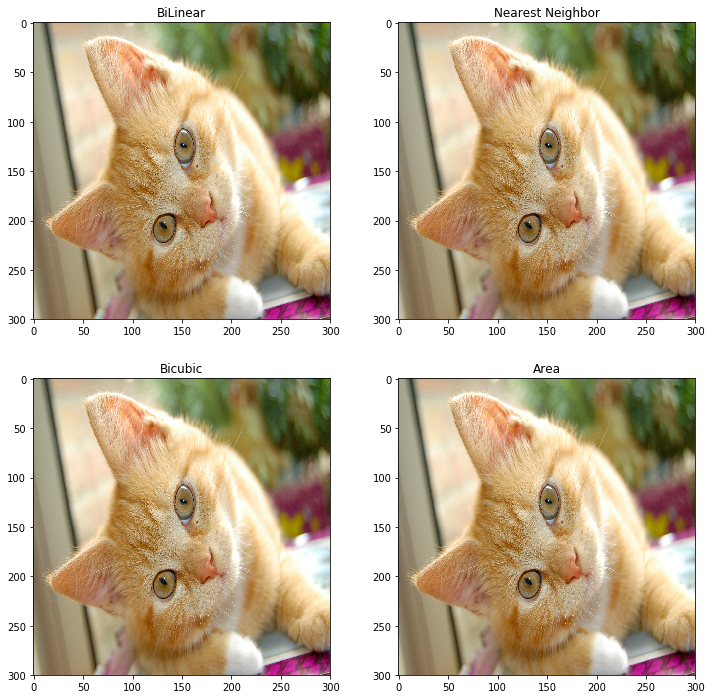

In [38]:
# 重新调整图片大小
with tf.Session() as sess:
    # 如果直接以0-255范围的整数数据输入resize_images，那么输出将是0-255之间的实数，
    # 不利于后续处理。本书建议在调整图片大小前，先将图片转为0.0-1.0范围的实数。
    image_float = tf.image.convert_image_dtype(img_data, tf.float32)
    # 调整图片大小
    
    # 原图
    plt.title('origin image')
    plt.imshow(image_float.eval())
    plt.show()
    
    plt.figure(figsize=(12,12))
    
    # method=0: 双线性插值法
    resized_BiLinear = tf.image.resize_images(image_float, [300, 300], method=0)
    # print(resized.eval()) # 0.0-1.0
    # print(resized.shape) # (300, 300, 3)
    plt.subplot(2,2,1)     #将窗口分为两行两列四个子图，则可显示四幅图片
    plt.title('BiLinear')
    plt.imshow(resized_BiLinear.eval())
    
    
    # method=1: 最近邻插值法
    resized_NN = tf.image.resize_images(image_float, [300, 300], method=1)
    plt.subplot(2,2,2)     #将窗口分为两行两列四个子图，则可显示四幅图片
    plt.title('Nearest Neighbor')
    plt.imshow(resized_BiLinear.eval())
    
    
    # method=2: 双三次插值法
    resized_Bicubic = tf.image.resize_images(image_float, [300, 300], method=2)
    plt.subplot(2,2,3)     #将窗口分为两行两列四个子图，则可显示四幅图片
    plt.title('Bicubic')
    plt.imshow(resized_BiLinear.eval())
    
    # method=3: 面积插值法
    resized_Bicubic = tf.image.resize_images(image_float, [300, 300], method=3)
    plt.subplot(2,2,4)     #将窗口分为两行两列四个子图，则可显示四幅图片
    plt.title('Area')
    plt.imshow(resized_BiLinear.eval())
    
    plt.show()

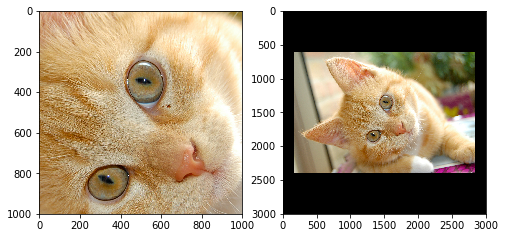

In [41]:
# 裁剪和填充图片
with tf.Session() as sess:    
    # resize_image_with_crop_or_pad函数调整图片大小. 若原始尺寸大于目标尺寸, 则自动截取居中部分. 若小于, 则用0填充
    croped = tf.image.resize_image_with_crop_or_pad(img_data, 1000, 1000) # 截取居中部分
    padded = tf.image.resize_image_with_crop_or_pad(img_data, 3000, 3000) # 填充背景
    
    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    plt.imshow(croped.eval())
    plt.subplot(1,2,2)
    plt.imshow(padded.eval())
    plt.show()

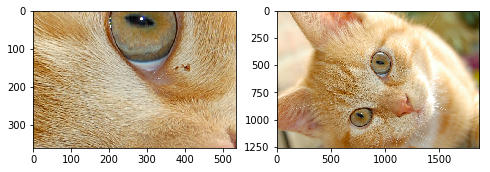

In [42]:
# 按比例居中截取图像(图像的长宽比不变)
with tf.Session() as sess: 
    # central_crop函数自动截取给定比例的居中部分图像,第二个参数是比例,取值为(0, 1]的实数
    central_cropped_2 = tf.image.central_crop(img_data, 0.2)
    central_cropped_7 = tf.image.central_crop(img_data, 0.7)
    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    plt.imshow(central_cropped_2.eval())
    plt.subplot(1,2,2)
    plt.imshow(central_cropped_7.eval())
    plt.show()

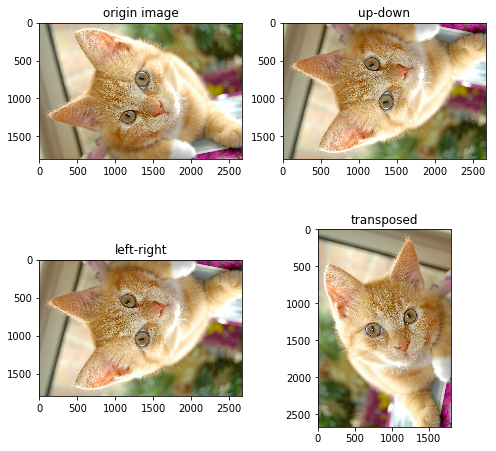

In [44]:
# 旋转图片,图像旋转基本不会改变图像识别结果, 可以随机进行旋转已排除无关因素对结果的影响
with tf.Session() as sess: 
    plt.figure(figsize=(8,8))
    
    # 原图
    plt.subplot(2,2,1)
    plt.title('origin image')
    plt.imshow(image_float.eval())
    
    # 上下翻转
    plt.subplot(2,2,2)
    plt.title("up-down")
    flipped1 = tf.image.flip_up_down(img_data)
    plt.imshow(flipped1.eval())
    
    # 左右翻转
    plt.subplot(2,2,3)
    plt.title("left-right")
    flipped2 = tf.image.flip_left_right(img_data)
    plt.imshow(flipped1.eval())
    
    #对角线翻转
    plt.subplot(2,2,4)
    plt.title("transposed")
    transposed = tf.image.transpose_image(img_data)
    plt.imshow(transposed.eval())
    
    plt.show()
    
    # 以一定概率上下翻转图片。 
    #flipped = tf.image.random_flip_up_down(img_data)
    # 以一定概率左右翻转图片。
    #flipped = tf.image.random_flip_left_right(img_data)

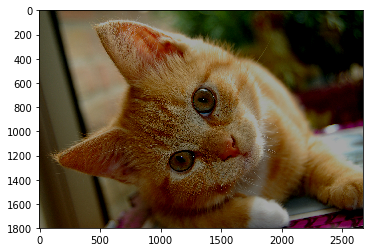

In [45]:
# 色彩调整
with tf.Session() as sess:
    # 在进行一系列图片调整前，先将图片转换为实数形式，有利于保持计算精度。
    image_float = tf.image.convert_image_dtype(img_data, tf.float32)
    
    # 将图片的亮度-0.5。
    #adjusted = tf.image.adjust_brightness(image_float, -0.5)
    
    # 将图片的亮度-0.5
    #adjusted = tf.image.adjust_brightness(image_float, 0.5)
    
    # 在[-max_delta, max_delta)的范围随机调整图片的亮度。
    adjusted = tf.image.random_brightness(image_float, max_delta=0.5)
    
    # 将图片的对比度-5
    #adjusted = tf.image.adjust_contrast(image_float, -5)
    
    # 将图片的对比度+5
    #adjusted = tf.image.adjust_contrast(image_float, 5)
    
    # 在[lower, upper]的范围随机调整图的对比度。
    #adjusted = tf.image.random_contrast(image_float, lower, upper)

    # 在最终输出前，将实数取值截取到0-1范围内。否则不仅无法进行可视化而且可能影响神经网络
    adjusted = tf.clip_by_value(adjusted, 0.0, 1.0)
    plt.imshow(adjusted.eval())
    plt.show()

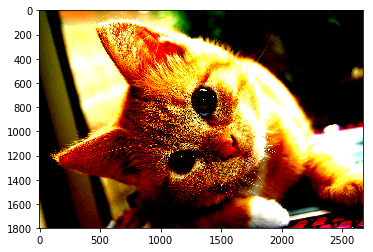

In [48]:
# 图像标准化: 将图像亮度均值变为0, 方差变为1
with tf.Session() as sess:
    norm = tf.image.per_image_standardization(image_float)
    norm = tf.clip_by_value(norm, 0.0, 1.0) # 图像处理后一定不要忘了进行clip
    plt.imshow(norm.eval())
    plt.show()

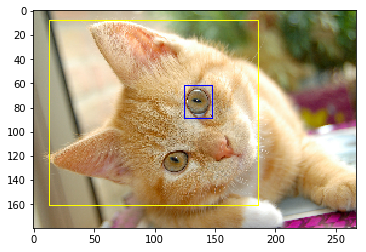

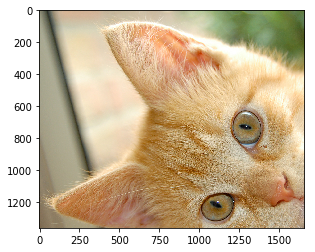

[[[0.06455203 0.25851104 0.9176405  0.7639356 ]]]


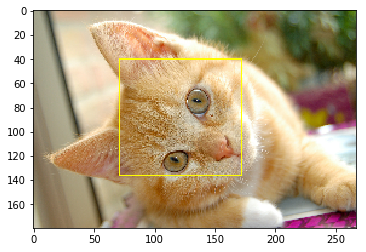

In [53]:
# 添加标注框
with tf.Session() as sess: 
    # sample_distorted_bounding_box要求输入图片必须是实数类型。
    image_float = tf.image.convert_image_dtype(img_data, tf.float32)
    # 在原图上用标注框画出截取的范围。由于原图的分辨率较大（2673x1797)，生成的标注框 
    # 在Jupyter Notebook上通常因边框过细而无法分辨，这里为了演示方便先缩小分辨率。
    image_small = tf.image.resize_images(image_float, [180, 267], method=0)
    # draw_bounding_boxes函数输入是一个batch数据,即多张图片,所以一共四维,所以这里增加一维
    batchced_img = tf.expand_dims(image_small, 0)

    # 以下坐标[Ymin, Xmin, Ymax, Xmax]都是图像的相对位置,即比例关系
    boxes = tf.constant([[[0.05, 0.05, 0.9, 0.7], [0.35, 0.47, 0.5, 0.56]]]) # 两个框
    result = tf.image.draw_bounding_boxes(batchced_img, boxes)
    plt.imshow(result[0].eval())
    plt.show()
    
    # image.sample_distorted_bounding_box对图像进行随机截取,min_object_covered=0.4代表至少包含40%的标注框中的内容
    begin, size, bbox_for_draw = tf.image.sample_distorted_bounding_box(
        tf.shape(image_float), bounding_boxes=boxes, min_object_covered=0.4)
    
    # 截取后的图片
    distorted_image = tf.slice(image_float, begin, size)
    plt.imshow(distorted_image.eval())
    plt.show()

    image_with_box = tf.image.draw_bounding_boxes(batchced_img, bbox_for_draw)
    print(bbox_for_draw.eval())
    plt.imshow(image_with_box[0].eval())
    plt.show()